In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
#import seaborn as sns

In [150]:
df = pd.read_csv('../../data/state-agency-co2e-data-2010-2014.csv')
df.head()

,Organization Name,Emission Year,Facility Name,Source Name,Activity Type,Fuel Type,Fuel,End Use Sector,Technology,CO2e
0,California Department of General Services,2013,000 Fleet Vehicles,NaN,SEM: Mobile Combustion - Scope 1,N\A,N\A,N\A,N\A,563.025594
1,California Department of General Services,2010,Lease#2243001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,848.793031
2,California Department of General Services,2010,Lease#5098002,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,12.768303
3,California Department of General Services,2010,Lease#5107001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,4.683929
4,California Department of General Services,2010,Lease#5368001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,0.265898


#### Structure

This data was stored as a csv file on the [data.ca.gov](https://data.ca.gov/dataset/calepa-state-agency-co2) website which made it very easy to read into a dataframe.

#### Granularity

In [151]:
df.shape

(8457, 10)

Each record is a different emission from different organizations, fuel type, year, activity, and end use sector. We see that data includes, for example, carbon emissions of a government building, government-owned vehicle, and even an entire fleet of government-owned vehicles. Given that there is nothing that contains a summary row, we believe that all the records capture granularity at the same level. Because the government agencies have the option to input their individual facilities, they are able to aggregate the sources at the agency level. There are 10 different features and 8,457 records. 

#### Scope

In [152]:
print('Minimum Year:', df['Emission Year'].min())
print('Maximum Year:', df['Emission Year'].max())

Minimum Year: 2010
Maximum Year: 2014


The scope of the data covers the equivalent carbon emissions from various  Government Agencies in California sourced from California EPA. 

#### Temporality

Although the scope of the data covers the 2010-2014 realm (2010-01-01 - 2014-12-31), according to the [data.ca.gov](https://data.ca.gov/dataset/calepa-state-agency-co2), this dataset was created in August 9th 2019 and was last updated in October 23, 2019.

#### Faithfulness

This data was collected by state agency reporters and entered into the Climate Registry Information System. These agencies enter in the raw data into this system which calculates the total CO2e for each source/facility. We deem this as a reliable source. However, there are a good amount of NaN values. In addition, because they are manually inputted, it would be a great idea to look at any input errors.

# Data Cleaning and Visualizations

In [153]:
df.shape

df.head()

,Organization Name,Emission Year,Facility Name,Source Name,Activity Type,Fuel Type,Fuel,End Use Sector,Technology,CO2e
0,California Department of General Services,2013,000 Fleet Vehicles,NaN,SEM: Mobile Combustion - Scope 1,N\A,N\A,N\A,N\A,563.025594
1,California Department of General Services,2010,Lease#2243001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,848.793031
2,California Department of General Services,2010,Lease#5098002,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,12.768303
3,California Department of General Services,2010,Lease#5107001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,4.683929
4,California Department of General Services,2010,Lease#5368001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,0.265898


In [154]:
df.columns

Index(['Organization Name', 'Emission Year', 'Facility Name', 'Source Name',
       'Activity Type', 'Fuel Type', 'Fuel', 'End Use Sector', 'Technology',
       'CO2e'],
      dtype='object')

In [155]:
df['Organization Name'].value_counts()

California Department of Fish and Wildlife (formerly California Dept of Fish and Game prior to 2013)    2272
California Department of General Services                                                                958
California Employment Development Department                                                             865
California Department of Corrections and Rehabilitation                                                  771
California Department of Forestry and Fire Protection                                                    695
California Environmental Protection Agency                                                               580
California Department of Rehabilitation                                                                  477
California Public Employees' Retirement System                                                           188
California Department of Social Services                                                                 184
California Departme

We see that some of the inputs in 'Source Name' -- particularly with the word 'Electricity' -- were inputted differently, so we look to correct this. Some reasons include typos, case-issues, etc. We also realize that some of the datatypes of the inputs are not as expected. For example, there was a random float number in the 'Fuel Type' column. Because of this, the goal is to convert all of the columns into strings and use regular expressions to in order to get the 'Source Name' with a single unified catagory of "Electricity." We assume that "Purchased Electricity" is the same as "Electricity." 

In [156]:
#pd.Series.to_string(df['Fuel Type'], df['Organization Name']), df['Emission Year'], df[Source Name])

#df['Fuel Type'] = df['Fuel Type'].astype(str)
df['Organization Name'] = df['Organization Name'].astype(str)
#df['Emission Year'] = df['Emission Year'].astype(str)
df['Source Name'] = df['Source Name'].astype(str)


In [157]:
df['Source Name'].value_counts()

Electricity                                        1280
Purchased Electricity                               892
ELECTRICITY                                         630
Gasoline                                            568
Natural Gas                                         500
                                                   ... 
Purchased marine fuel                                 1
Orange A&I Field Office (The City Dr.)                1
Vehicles - Gasoline - Model Year 2006 Passenger       1
Stationary Combustion Diesel                          1
ELECTRIC                                              1
Name: Source Name, Length: 344, dtype: int64

In [158]:
df['Source Name'].value_counts()
SourceNameColumn = pd.Series.tolist(df['Source Name'])
position_counter = 0
regex = r"[Ee]+(lec)|(LEC)" #regex to capture all the things with Electricity-like things in them
indexes = []

for element in SourceNameColumn:
    position_counter += 1
    
    z = re.search(regex, element)
    if z:
        indexes += [position_counter] #if there's a match, put the index into this list
        #print(z)

df.iloc[indexes]['Source Name'].value_counts().tail(20)


Orange A&I Field Office (The City Dr.)                    1
Purchased CNG                                             1
Biofuel -- Biogenic CO2                                   1
1090726                                                   1
ADP (1700 K St.)                                          1
Purchased Diesel Fuel                                     1
Plant Ops Equipment (Gasoline)                            1
Total Electricity                                         1
E-85 biogenic emissions (Light Duty Vehicles PC & Van)    1
Pressure Washer (Diesel)                                  1
Net AMP                                                   1
Fuel                                                      1
Purchased natural gas                                     1
SF6                                                       1
Gasoline Light Trucks (Vans, Pickup Trucks, SUVs)         1
Purchased kerosene                                        1
Fresno Field Office (North Fresno St.)  

This dataframe above should have all of the matches to "Electricity." However, if we look at the Source Name, we find that there are some unexpected matches with certain words. For example, there are a couple of misinputted entries as well as errors with the regular expressions.

In the interest of time, we explore the areas where the data needs to be cleaned. If there was more time, the team would realize:
- A unified key to classify items under. For example, "Purchased Electricity" and all misspellings of "Electricity" change to "Electricity" or even a number to make entry logging easier.
- More accurate regular expression keys. (NOTE 1)

Seen below are the value counts for the columns. 

In [159]:
df['Fuel Type'].value_counts()

WECC California                        3410
Motor Gasoline                         1407
Natural Gas                            1136
Diesel Fuel                             841
Petroleum Products                      752
Alternative Fuels                       245
N\A                                     178
PreCalculated                            54
Fossil Fuel-derived Fuels (gaseous)      49
Aircraft Fuel                            45
Biofuels                                 41
WECC Northwest                           31
WECC Southwest                           10
Ethane                                    5
Coal                                      5
US Territories                            1
Crude Oil                                 1
SPP North                                 1
Name: Fuel Type, dtype: int64

In [160]:
df['Fuel'].value_counts()

All                                    5707
Unspecified (Weighted U.S. Average)    1088
Propane (Liquid)                        378
Distillate Fuel Oil No. 2               272
N\A                                     178
Compressed Natural Gas (CNG)            143
Propane                                  88
Ethanol                                  59
PreCalculated                            54
Propane (Gas)                            46
Liquefied Petroleum Gas (LPG)            45
Aviation Gasoline                        38
Pipeline (US weighted average)           19
Kerosene                                 12
1,000 - 1,025 Btu / SCF                  12
LPG (average for fuel use)               12
Acetylene                                10
Greater than 1,100 Btu / SCF              9
Jet Fuel (Jet A or A-1)                   7
Biodiesel (100%)                          5
Bituminous                                5
Motor Gasoline                            5
1,025 - 1,035 Btu / SCF         

In [161]:
import re

test = pd.Series.tolist(df['Source Name'])
#test = [x for x in test if x != ]
test1 = df['Source Name'].astype("string")
type(df['Source Name'])
# strinng
regex = r"([Ee]lec)"
re.findall(regex, test1)




#df['date'] = df['date'].str.replace(re_express, r'\1\2\3')

TypeError: expected string or bytes-like object

In [162]:
wee = df[df["Organization Name"].str.contains("California Department of General Services")]
wee


,Organization Name,Emission Year,Facility Name,Source Name,Activity Type,Fuel Type,Fuel,End Use Sector,Technology,CO2e
0,California Department of General Services,2013,000 Fleet Vehicles,nan,SEM: Mobile Combustion - Scope 1,N\A,N\A,N\A,N\A,563.025594
1,California Department of General Services,2010,Lease#2243001,nan,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,848.793031
2,California Department of General Services,2010,Lease#5098002,nan,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,12.768303
3,California Department of General Services,2010,Lease#5107001,nan,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,4.683929
4,California Department of General Services,2010,Lease#5368001,nan,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,0.265898
...,...,...,...,...,...,...,...,...,...,...
5194,California Department of General Services,2014,Lease#5751001,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,80.097359
5195,California Department of General Services,2014,Lease#5837001,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,197.338917
5196,California Department of General Services,2014,Lease#5893001,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,30.050371
5197,California Department of General Services,2014,Lease#6010001,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,74.438351


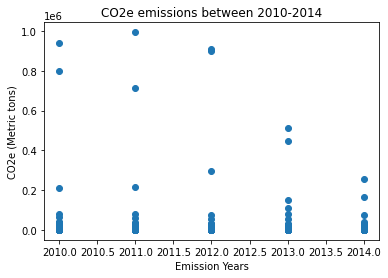

In [163]:
plt.scatter(df['Emission Year'], df['CO2e'])
plt.xlabel('Emission Years')
plt.ylabel('CO2e (Metric tons)')
plt.title("CO2e emissions between 2010-2014")
plt.show()



In [164]:
df2010 = df[df["Emission Year"] == 2010]
df2011 = df[df["Emission Year"] == 2011]
df2012 = df[df["Emission Year"] == 2012]
df2013 = df[df["Emission Year"] == 2013]
df2014 = df[df["Emission Year"] == 2014]
df2010.columns

Index(['Organization Name', 'Emission Year', 'Facility Name', 'Source Name',
       'Activity Type', 'Fuel Type', 'Fuel', 'End Use Sector', 'Technology',
       'CO2e'],
      dtype='object')

In [165]:
df2010['Fuel Type'].unique()

array(['N\\A', 'WECC California', 'Natural Gas', 'Motor Gasoline', nan,
       'Petroleum Products', 'Biofuels', 'Alternative Fuels',
       'Diesel Fuel', 'Aircraft Fuel', 'WECC Southwest', 'WECC Northwest',
       'Ethane', 'PreCalculated', 'Coal', 'US Territories',
       'Fossil Fuel-derived Fuels (gaseous)'], dtype=object)

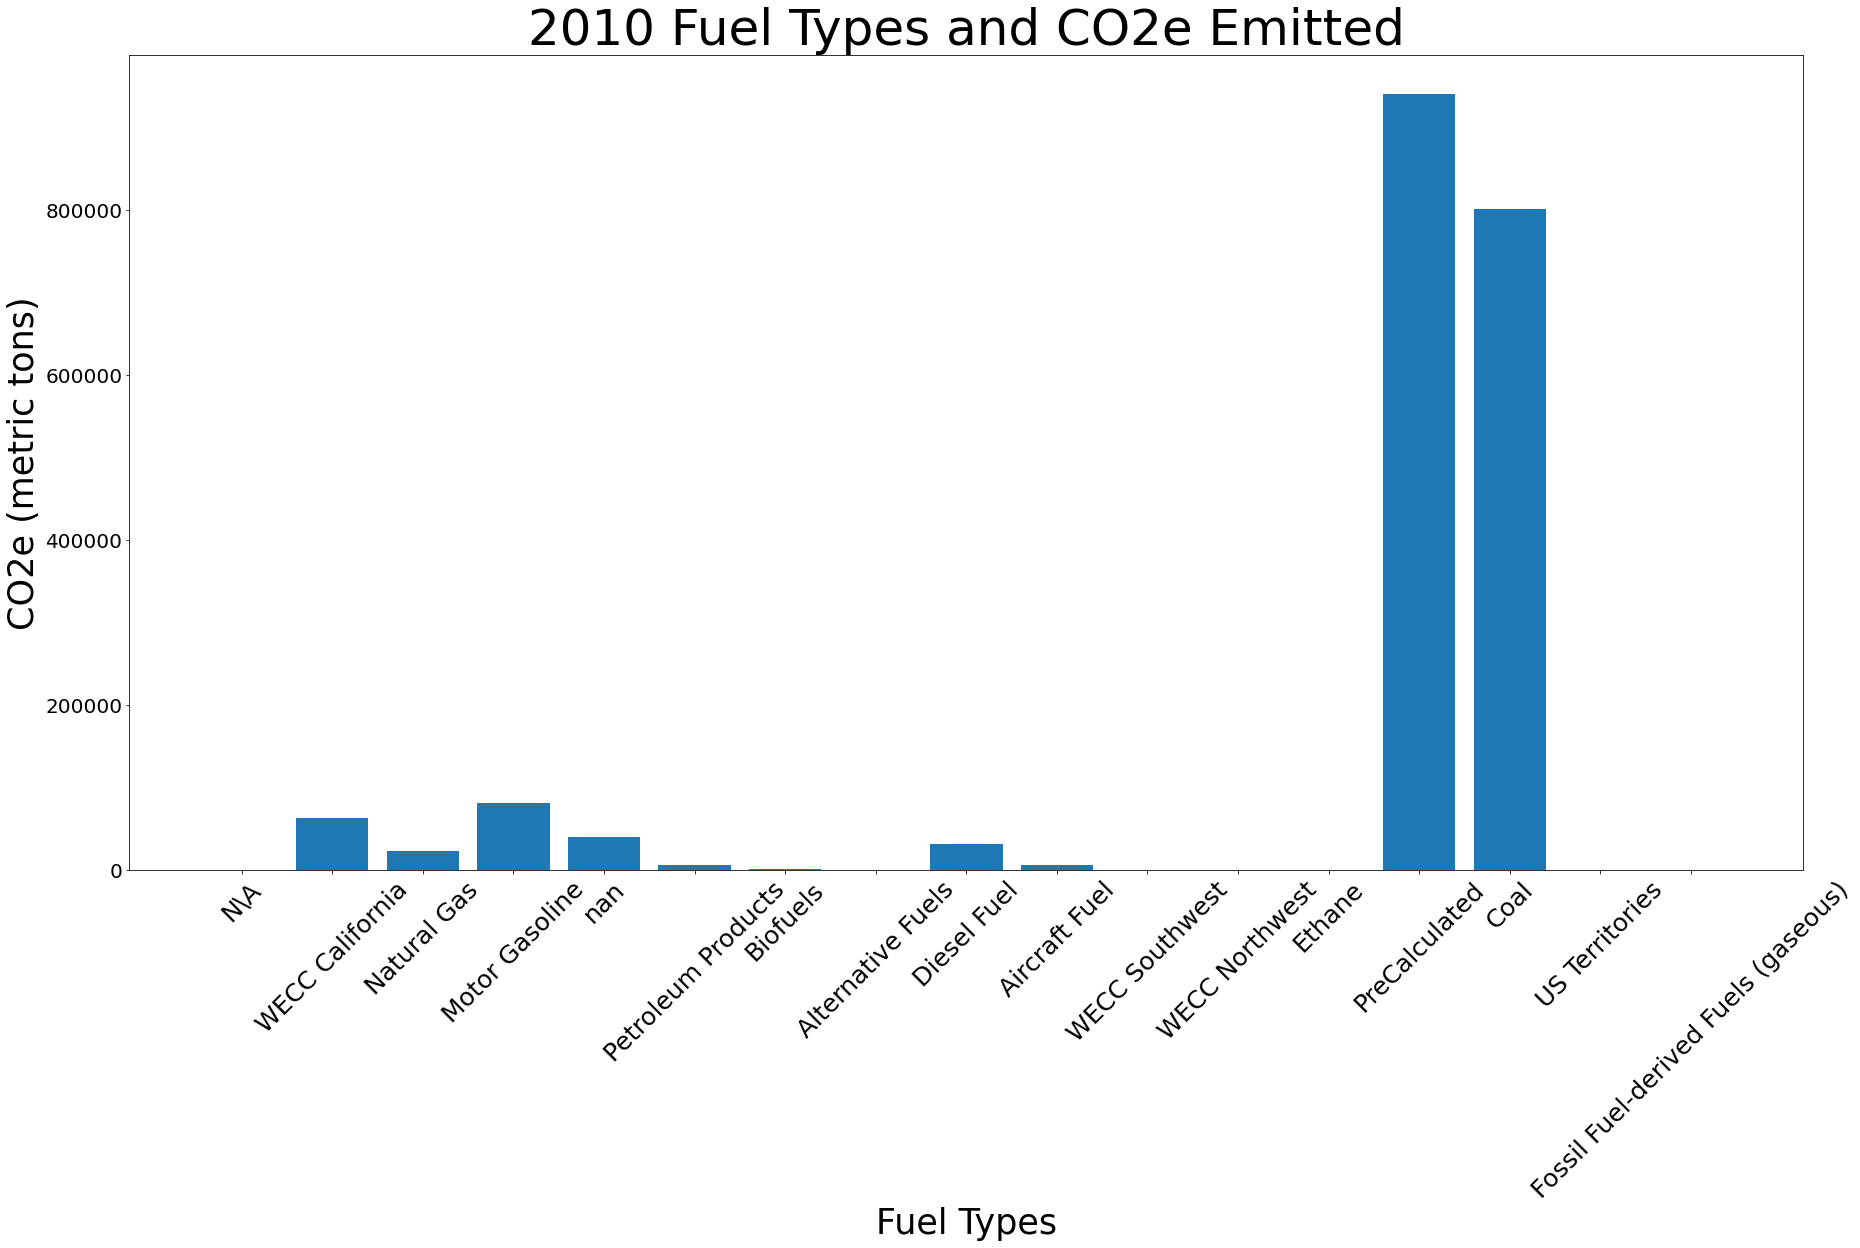

In [166]:
plt.figure(figsize=(30,15))
plt.bar(np.array(df2010['Fuel Type'].tolist()), df2010['CO2e'])
plt.tick_params(axis="x", rotation = 45, labelsize=25)
plt.tick_params(axis = 'y', labelsize=20)
plt.ylabel('CO2e (metric tons)', fontsize = 35)
plt.xlabel('Fuel Types', fontsize = 35)
plt.title('2010 Fuel Types and CO2e Emitted', fontsize = 50)

plt.show()

# What fuel type emitted the most in 2010?

# NOTE 1

The regular expression (Regex) key used to find the anomalies with "Electricity" in "Source Name" is: 

*r"[Ee]+(lec)|(LEC)"*

This was tested using www.regex101.com, however, as seen in the photo below, the Regex key should not pick up the random keys using the website to test the Regex, but when filtering the dataframe with the for loop, random keys were picked up. Because of this, we do not believe that there is an error with the regex, but there is an error with how it was looped.

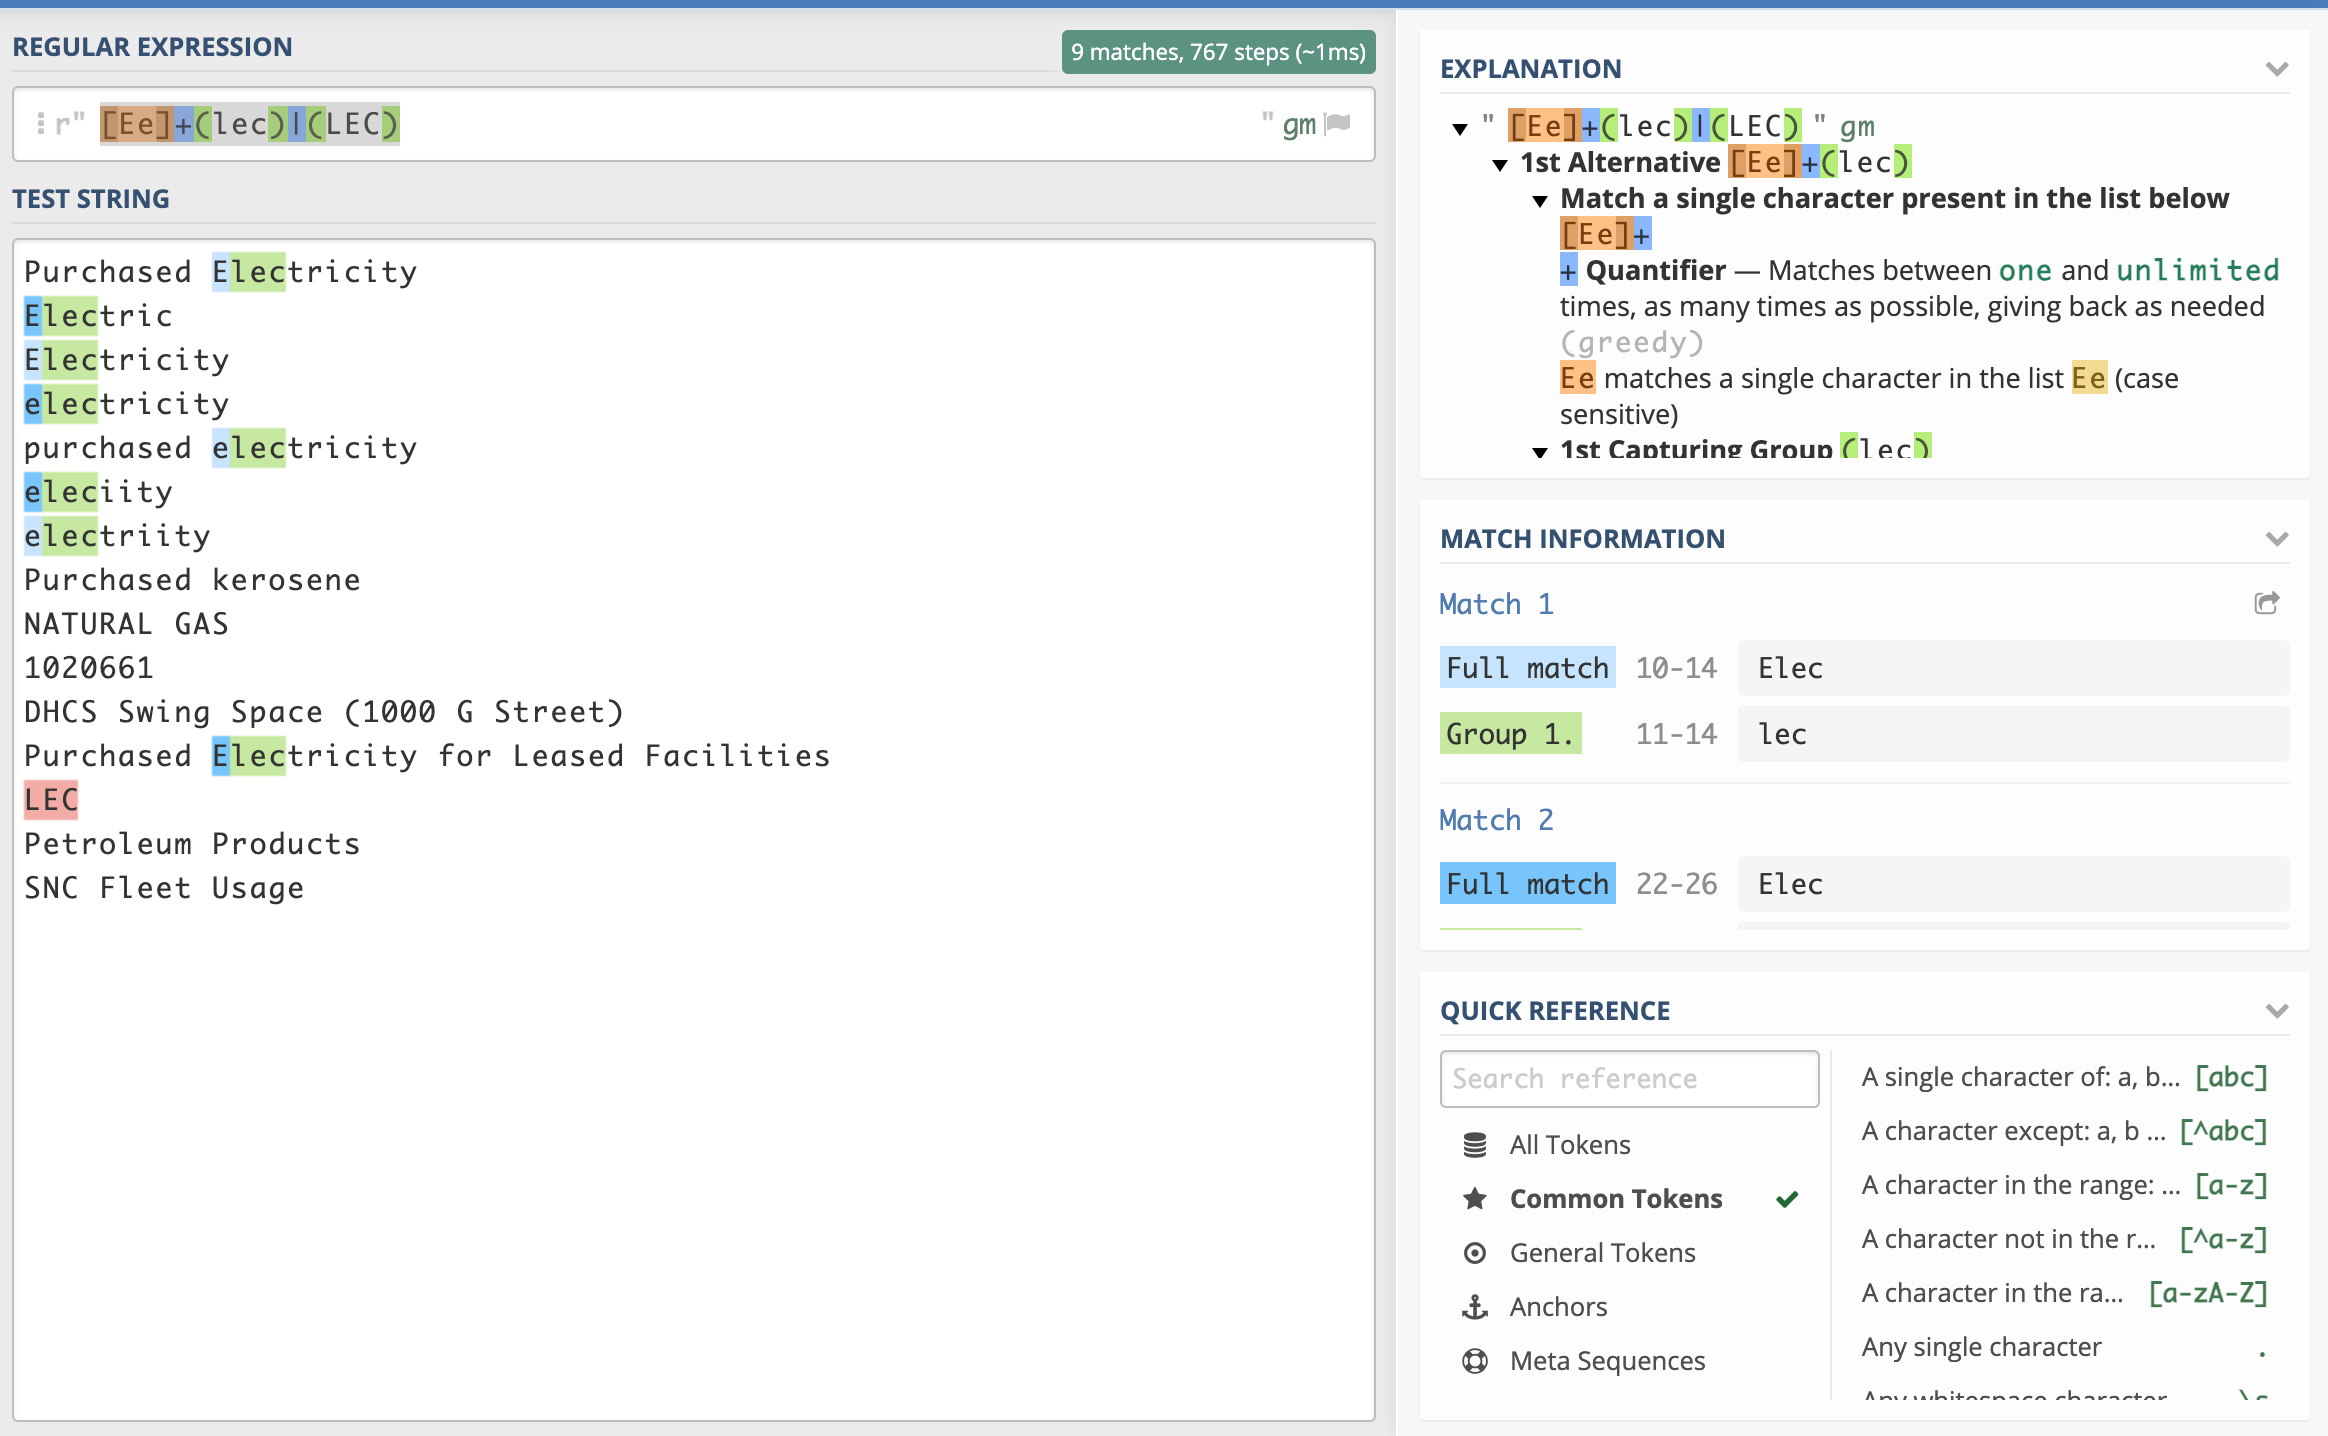

Use the link below in case the above screenshot is not viewable

[ReGex Screenshot](../../code/eda/regexScreenShot.png)